In [24]:
#importing the dataset via the url from UCI and processing it
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header = None)

In [135]:
#importing the dataset via the scikit-learn datasets
from sklearn import datasets
iris = datasets.load_iris()

In [136]:
#choosing only the sepal_width and petal_width as features
X = iris.data[:,(1,3)]
y = iris.target[:]

In [137]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,stratify = y)

In [138]:
#standardizing the features using Standard_Scaler to get more accurate results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [139]:
#combining the standardized features and normal features as well to plot them in a figure
import numpy as np
X_std_combined = np.vstack([X_train_std,X_test_std])
X_combined = np.vstack([X_train,X_test])
y_combined = np.hstack([y_train,y_test])

In [140]:
#function to plot a decision region

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X,y,classifier,test_idx=None,resolution = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('red','blue','green','cyan','grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                          np.arange(x2_min, x2_max,resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha = 0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha = 0.8,marker=markers[idx],color = colors[idx],
                   label = f'class : {cl}',edgecolor='black')
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],edgecolor='black',color='none',alpha=1.,marker = 'o',s=100,linewidth = 1,
                    label='Test set')
        
    

In [141]:
#using Support Vector Machine linear classifer
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C = 10)
svm.fit(X_train_std, y_train)
svm.score(X_test_std,y_test)

0.9777777777777777

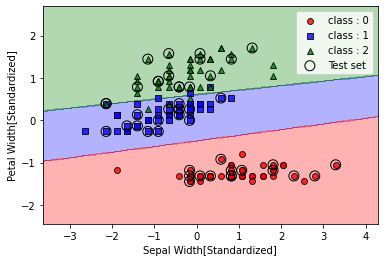

In [164]:
plot_decision_regions(X_std_combined, y_combined,classifier = svm,test_idx = range(105,150))
plt.xlabel('Sepal Width[Standardized]')
plt.ylabel('Petal Width[Standardized]')
plt.legend(loc='best')
plt.show()

In [161]:
#Classifyin using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.9777777777777777

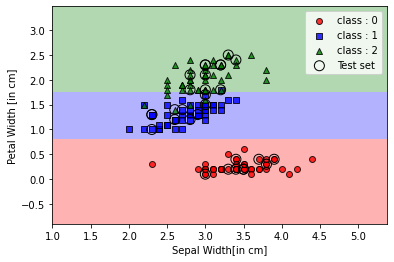

In [163]:
#plotting a decision region for Decision tree classifier
plot_decision_regions(X_combined,y_combined,classifier = dtc,test_idx = range(70,100))
plt.xlabel('Sepal Width[in cm]')
plt.ylabel('Petal Width [in cm]')
plt.legend(loc = 'best')
plt.show()

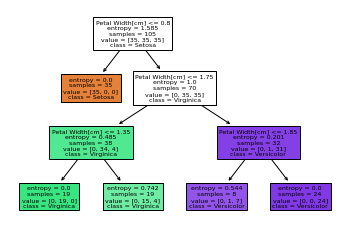

In [177]:
#visualizing the decision tree
from sklearn import tree
tree.plot_tree(dtc,filled=True,
               feature_names=['Sepal Width[cm]','Petal Width[cm]'],
               class_names = ['Setosa','Virginica','Versicolor'])
plt.show()